# NCA classification analysis

We consider 4 sets of VSR shapes (i.e., boolean grids).

Set 1

![set1](../shapes/set1.png)

Set 2

![set2](../shapes/set2.png)

Set 3

![set3](../shapes/set3.png)

Set 4

![set4](../shapes/set4.png)

In [30]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
progress_dfs = []
for ts in range(1, 5):
  progress_df = pd.read_csv(f"../training/larger_net_progress_{ts}.txt", sep=";")
  progress_df["target_set"] = ts
  progress_dfs.append(progress_df)
progress = pd.concat(progress_dfs, ignore_index=True)
progress.head()

,iteration,loss,accuracy,target_set
0,0,0.095679,0.322581,1
1,1,0.085889,0.354839,1
2,2,0.076278,0.354839,1
3,3,0.067804,0.258065,1
4,4,0.067871,0.419355,1


For each of the target sets we train a NCA to identify the shape the VSR is arranged in.
Here we report the accuracy and the loss at training time for each target set (one color per set).

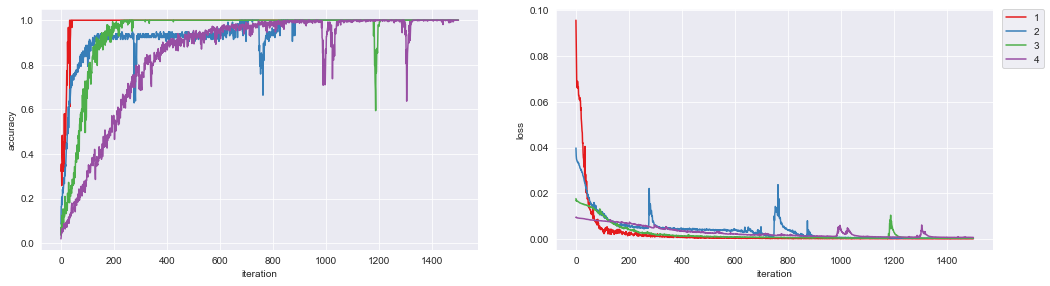

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
sns.lineplot(data=progress, x="iteration", y="accuracy", hue="target_set", ax=ax[0], palette="Set1", legend=False)
sns.lineplot(data=progress, x="iteration", y="loss", hue="target_set", ax=ax[1], palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()

After training the NCA on a set, we evaluate its inference performance.
To this extent, we run the NCA for a total of 100 steps (for each VSR shape in each target set) and compute the classification accuracy (# correctly classified voxels / # voxels) and the majority voting accuracy (1 if the most commonly predicted shape is correct, 0 otherwise) at each step.

In [33]:
df = pd.read_csv("../classifications/larger_net_classification.csv")
df["majority_vote_accuracy"] = np.where(df.shape_id == df.majority_vote, 1, 0)
df.head()

,target_set,shape_id,readable_shape,step,classification,accuracy,majority_vote,majority_vote_accuracy
0,1,0,1111-1111-1001,0,0;0;2-3;0;2-0;1;0-1;1;1-2;1;1-3;1;0-0;2;2-1;2;...,0.2,2,0
1,1,0,1111-1111-1001,1,0;0;2-3;0;2-0;1;0-1;1;1-2;1;1-3;1;0-0;2;0-1;2;...,0.4,0,1
2,1,0,1111-1111-1001,2,0;0;0-3;0;2-0;1;0-1;1;0-2;1;0-3;1;0-0;2;0-1;2;...,0.7,0,1
3,1,0,1111-1111-1001,3,0;0;0-3;0;0-0;1;0-1;1;0-2;1;0-3;1;0-0;2;0-1;2;...,1.0,0,1
4,1,0,1111-1111-1001,4,0;0;0-3;0;0-0;1;0-1;1;0-2;1;0-3;1;0-0;2;0-1;2;...,1.0,0,1


Here we plot the mean accuracy and majority voting accuracy across all the shapes in each set (one color per set).

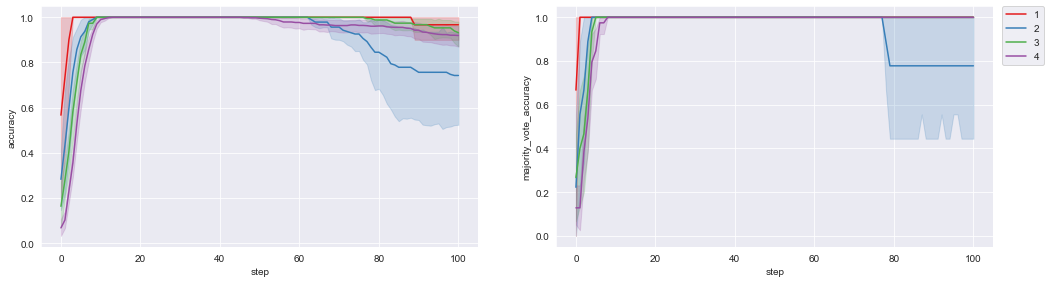

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
sns.lineplot(data=df, x="step", y="accuracy", hue="target_set", ax=ax[0], palette="Set1", legend=False)
sns.lineplot(data=df, x="step", y="majority_vote_accuracy", hue="target_set", ax=ax[1], palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()

Here we plot the accuracy for each shape and each target set across the steps.

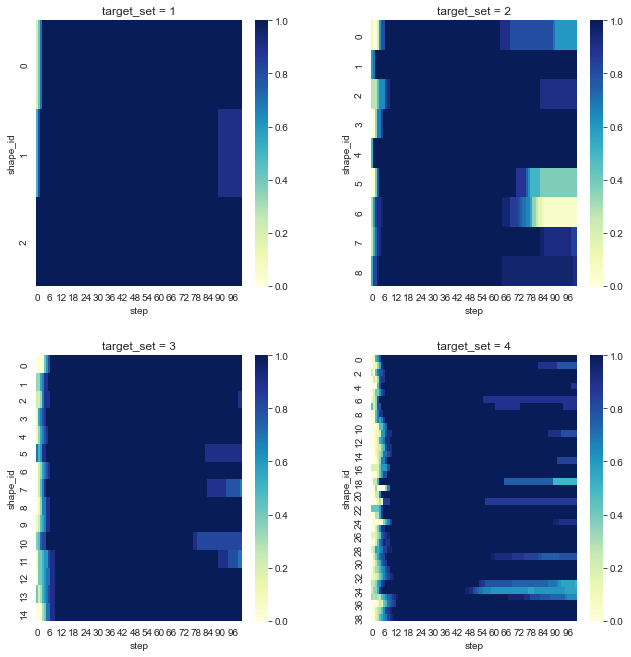

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)
ts = 1
for i in range(2):
  for j in range(2):
    sns.heatmap(df.loc[df.target_set == ts].pivot(index="shape_id", columns="step", values="accuracy"), vmin=0, vmax=1,
                ax=ax[i][j], cmap="YlGnBu")
    ax[i][j].set_title(f"target_set = {ts}")
    ts += 1
plt.show()

Here we plot the majority voting accuracy for each shape and each target set across the steps.

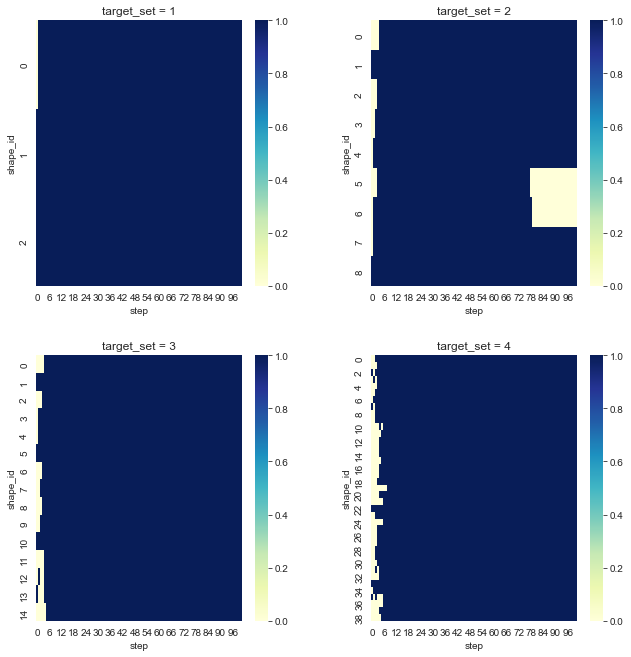

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)
ts = 1
for i in range(2):
  for j in range(2):
    sns.heatmap(df.loc[df.target_set == ts].pivot(index="shape_id", columns="step", values="majority_vote_accuracy"),
                vmin=0, vmax=1,
                ax=ax[i][j], cmap="YlGnBu")
    ax[i][j].set_title(f"target_set = {ts}")
    ts += 1
plt.show()

In [45]:
from utils import PgfplotsUtils

PgfplotsUtils.line_plot(df, x="step", y=["accuracy", "majority_vote_accuracy"], groups=["target_set"],
                        filename="../pgfplots/nca_accuracy")